In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df['date']=pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df.describe(include='all')

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,rain
freq,NaN,NaN,NaN,NaN,NaN,641
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136,NaN
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000,NaN
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000,NaN
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000,NaN
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000,NaN


In [7]:
df.shape

(1461, 6)

In [8]:
df['date'].min()

Timestamp('2012-01-01 00:00:00')

In [9]:
df['date'].max()

Timestamp('2015-12-31 00:00:00')

In [10]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

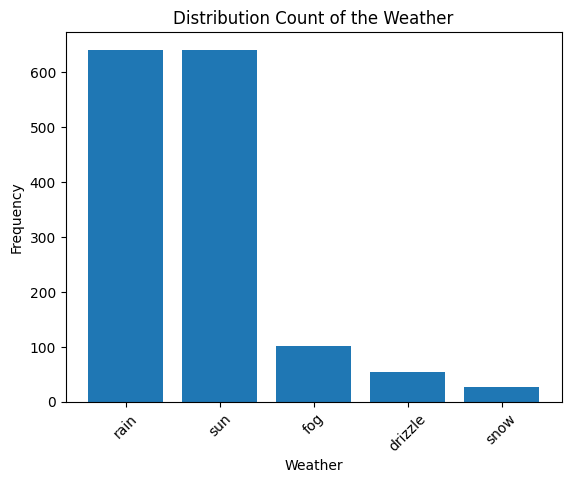

In [11]:
dw=df['weather'].value_counts()
plt.bar(dw.index, dw.values)
plt.title('Distribution Count of the Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [12]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

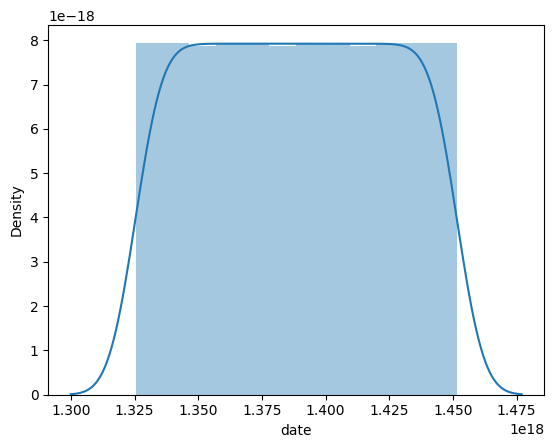

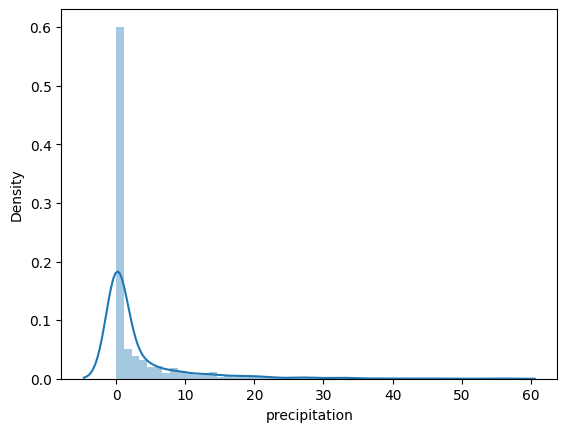

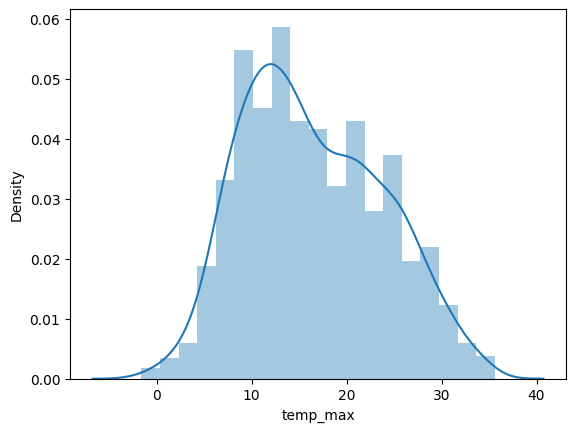

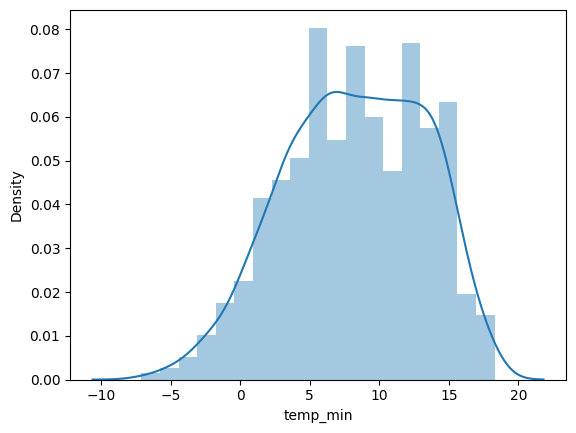

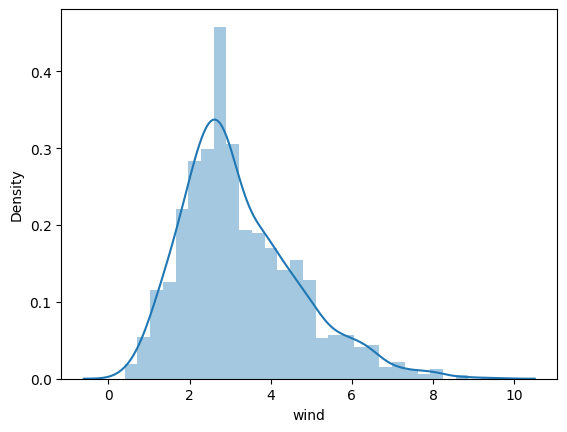

In [13]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [14]:
monthly_temp_avg=df.groupby(df['date'].dt.to_period('M'))['temp_max'].mean()
monthly_temp_avg

date
2012-01     7.054839
2012-02     9.275862
2012-03     9.554839
2012-04    14.873333
2012-05    17.661290
2012-06    18.693333
2012-07    22.906452
2012-08    25.858065
2012-09    22.880000
2012-10    15.829032
2012-11    11.326667
2012-12     7.235484
2013-01     6.106452
2013-02     9.467857
2013-03    12.709677
2013-04    14.243333
2013-05    19.625806
2013-06    23.253333
2013-07    26.093548
2013-08    26.119355
2013-09    21.360000
2013-10    14.229032
2013-11    12.053333
2013-12     7.022581
2014-01     9.600000
2014-02     8.200000
2014-03    12.906452
2014-04    15.460000
2014-05    19.870968
2014-06    21.590000
2014-07    26.900000
2014-08    26.383871
2014-09    23.163333
2014-10    17.961290
2014-11    11.030000
2014-12    10.138710
2015-01    10.154839
2015-02    12.517857
2015-03    14.377419
2015-04    15.503333
2015-05    20.025806
2015-06    26.063333
2015-07    28.093548
2015-08    26.087097
2015-09    20.293333
2015-10    17.538710
2015-11     9.683333
2015-12 

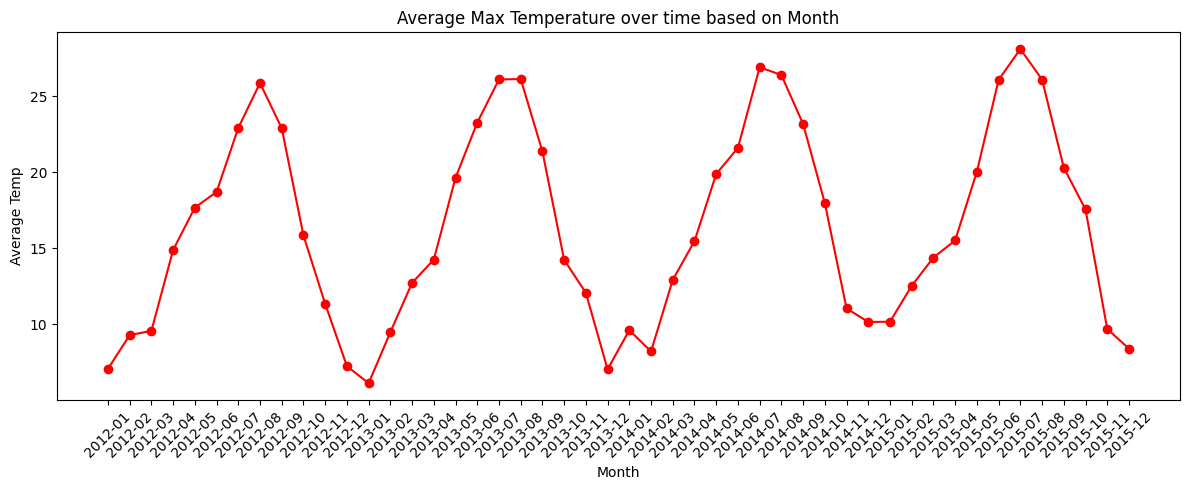

In [15]:
plt.figure(figsize=(12,5))
monthly_temp_avg=df.groupby(df['date'].dt.to_period('M'))['temp_max'].mean()
monthly_temp_avg.index=monthly_temp_avg.index.astype(str)
plt.plot(monthly_temp_avg.index, monthly_temp_avg.values, marker='o', color='red')
plt.title('Average Max Temperature over time based on Month')
plt.xlabel('Month')
plt.ylabel('Average Temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df_d=pd.get_dummies(df['weather'], prefix='weather', dtype=int)
df_encoded=pd.concat([df, df_d], axis=1)
df_encoded=df_encoded.drop('weather', axis=1)
df_encoded.head()

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0


In [17]:
#df_temp=df_encoded.reset_index()
x=df_encoded.drop(columns={'date','temp_max'}, axis=1)
y=df_encoded['temp_max']

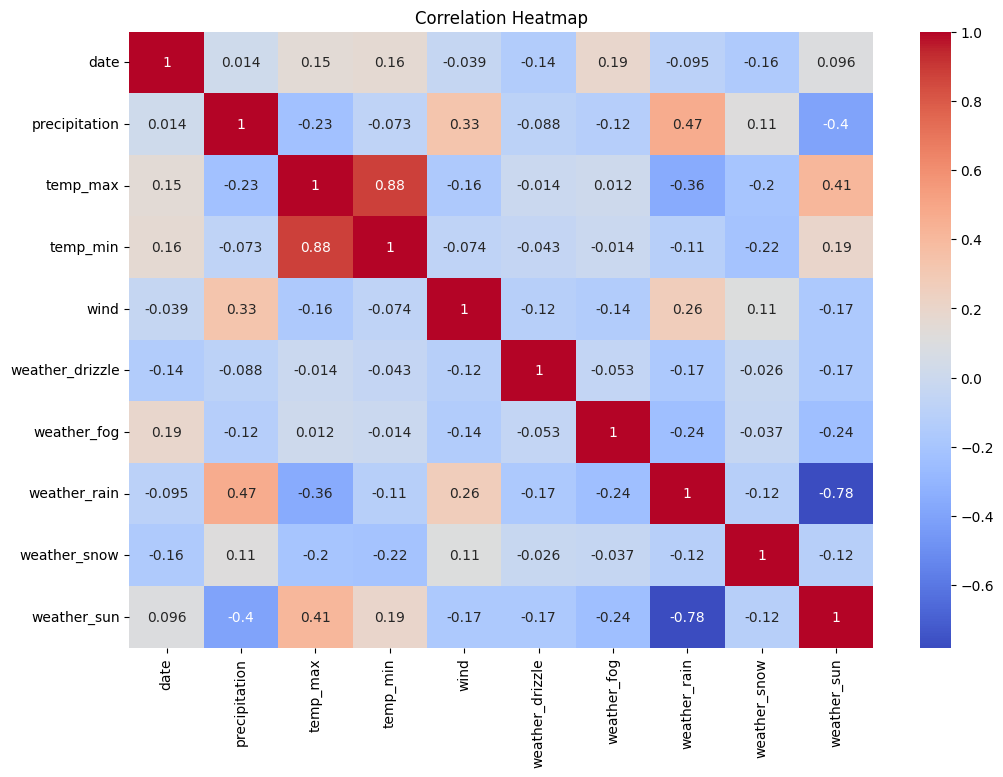

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [21]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
yhat_lreg_train=lreg.predict(x_train)
yhat_lreg_test=lreg.predict(x_test)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [24]:
r2=r2_score(y_test, yhat_lreg_test)
print(f'R-Squared score: {r2:.4f}')

R-Squared score: 0.8524


In [25]:
mse=mean_squared_error(y_test, yhat_lreg_test)
rmse=np.sqrt(mse)
print(f'Mean Squared Error(MSE): {mse:.4f}')
print(f'Root Mean Squared Error(RMSE): {rmse:.4f}')

Mean Squared Error(MSE): 8.0927
Root Mean Squared Error(RMSE): 2.8448


In [26]:
x_data=pd.DataFrame({
    'Precipitation':[9.4],
    'temp_min':[2.8],
    'Wind':[4.6],
    'Weather_drizzle':[0],
    'Weather_fog':[0],
    'Weather_rain':[0],
    'Weather_snow':[0],
    'Weather_sun':[1]
})
x_data.head()

,Precipitation,temp_min,Wind,Weather_drizzle,Weather_fog,Weather_rain,Weather_snow,Weather_sun
0,9.4,2.8,4.6,0,0,0,0,1


In [27]:
x_data.pred=lreg.predict(x_data).round(1)

In [28]:
x_data['temp_max']=x_data.pred

In [29]:
x_data.head()

,Precipitation,temp_min,Wind,Weather_drizzle,Weather_fog,Weather_rain,Weather_snow,Weather_sun,temp_max
0,9.4,2.8,4.6,0,0,0,0,1,30.7


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
yhat_rfr_train=rfr.predict(x_train)
yhat_rfr_test=rfr.predict(x_test)

In [32]:
r2=r2_score(y_test, yhat_rfr_test)
print(f'R-Squared score:{r2:.4f}')

R-Squared score:0.8185


In [33]:
mse=mean_squared_error(y_test, yhat_rfr_test)
rmse=np.sqrt(mse)
print(f'Mean Squared Error(MSE): {mse:.4f}')
print(f'Root Mean Squared Error(RMSE): {rmse:.4f}')

Mean Squared Error(MSE): 9.9536
Root Mean Squared Error(RMSE): 3.1549


In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:

"""

# Set date as index
#df = df.set_index('date')

# Select the temperature column you want to forecast
y = df['temp_max']

# -----------------------------------------------------
# 2. FIT THE ARIMA(5,1,0) MODEL
# -----------------------------------------------------
model = ARIMA(y, order=(5,1,0))
results = model.fit()

# -----------------------------------------------------
# 3. FORECAST NEXT 5 DAYS
# -----------------------------------------------------
forecast = results.forecast(10)
print("5-Day Temperature Forecast:")
print(forecast)

"""


'\n\n# Set date as index\n#df = df.set_index(\'date\')\n\n# Select the temperature column you want to forecast\ny = df[\'temp_max\']\n\n# -----------------------------------------------------\n# 2. FIT THE ARIMA(5,1,0) MODEL\n# -----------------------------------------------------\nmodel = ARIMA(y, order=(5,1,0))\nresults = model.fit()\n\n# -----------------------------------------------------\n# 3. FORECAST NEXT 5 DAYS\n# -----------------------------------------------------\nforecast = results.forecast(10)\nprint("5-Day Temperature Forecast:")\nprint(forecast)\n\n'

In [36]:
"""
# -----------------------------------------------------
# 4.PLOT HISTORY + FORECAST
# -----------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(y, label="Historical Temp")
plt.plot(forecast, label="Forecast (Next 5 Days)")
plt.title("Temperature Forecast (ARIMA 5,1,0)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

"""

'\n# -----------------------------------------------------\n# 4.PLOT HISTORY + FORECAST\n# -----------------------------------------------------\nplt.figure(figsize=(12,5))\nplt.plot(y, label="Historical Temp")\nplt.plot(forecast, label="Forecast (Next 5 Days)")\nplt.title("Temperature Forecast (ARIMA 5,1,0)")\nplt.xlabel("Date")\nplt.ylabel("Temperature (°C)")\nplt.legend()\nplt.show()\n\n'

In [37]:
from pmdarima import auto_arima

# -----------------------------------------------------
# 1. Load Data
# -----------------------------------------------------

df = df.set_index('date')

y = df['temp_max']

# -----------------------------------------------------
# 2. Fit auto_arima
# -----------------------------------------------------
model = auto_arima(
    y,
    seasonal=False,     # No seasonality
    trace=True,         # Shows model search
    error_action='ignore',
    suppress_warnings=True
)

print(model.summary())

# -----------------------------------------------------
# 3. Forecast next 20 days
# -----------------------------------------------------
forecast = model.predict(n_periods=20)
print("Next 5-Day Forecast:")
print(forecast)
"""

📌 What auto_arima does for you

auto_arima automatically finds the best:

p (AR order)

d (differencing)

q (MA order)

It tests many combinations and picks the one with the lowest AIC.
"""

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7238.306, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7231.935, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7226.732, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7236.310, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7071.388, Time=1.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7047.884, Time=0.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7187.029, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7048.660, Time=1.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7050.406, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7158.099, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7045.897, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7069.398, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7

'\n\n📌 What auto_arima does for you\n\nauto_arima automatically finds the best:\n\np (AR order)\n\nd (differencing)\n\nq (MA order)\n\nIt tests many combinations and picks the one with the lowest AIC.\n'

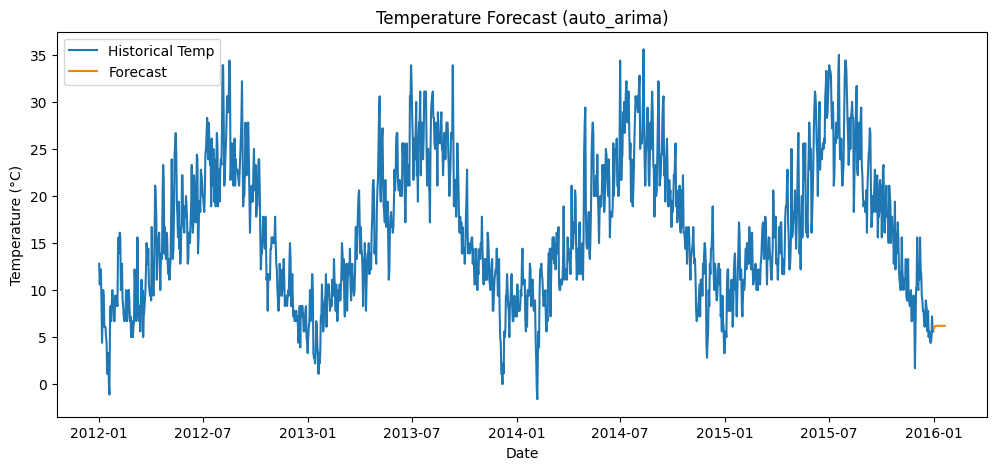

In [38]:
# -----------------------------------------------------
# 4. Plot
# -----------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(y, label='Historical Temp')
plt.plot(
    pd.date_range(start=y.index[-1], periods=21, freq='D')[1:],
    forecast,
    label='Forecast'
)
plt.title("Temperature Forecast (auto_arima)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [39]:
print(forecast)

2016-01-01    5.876085
2016-01-02    6.063769
2016-01-03    6.152769
2016-01-04    6.187039
2016-01-05    6.197897
2016-01-06    6.200488
2016-01-07    6.200732
2016-01-08    6.200535
2016-01-09    6.200368
2016-01-10    6.200281
2016-01-11    6.200246
2016-01-12    6.200234
2016-01-13    6.200231
2016-01-14    6.200230
2016-01-15    6.200230
2016-01-16    6.200231
2016-01-17    6.200231
2016-01-18    6.200231
2016-01-19    6.200231
2016-01-20    6.200231
Freq: D, dtype: float64
